# Results (tables, figs)

In [1]:
# HIDE CODE


import os, sys
sys.path.insert(0, './')
from utils.plotting import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
%matplotlib inline
set_style()

In [2]:
device_idx = 0
device = f'cuda:{device_idx}'

In [3]:
root = 'Dropbox/git/IterativeVAE'  # base directory for the project (update to match yours)
root = add_home(f"{root}/results")  # contains processed results, saved as pandas DataFrames

## Figure 3: convergence

In [4]:
from figures.final import fig_convergence

In [5]:
df_convergence = pd.read_pickle(pjoin(root, 'df_convergence.df'))

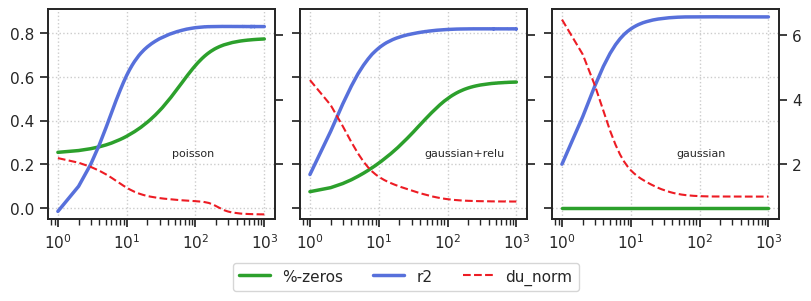

In [6]:
_ = fig_convergence(df_convergence, legend=True, display=True)

In [7]:
df = df_convergence.loc[df_convergence['time'] == 999]
df

,type,latent_act,str_model,t_train,beta_outer,time,r2,%-zeros,du_norm
999,poisson,None,poisson,16,24.0,999,0.829913,0.773224,0.461616
1999,gaussian,relu,gaussian+relu,16,8.0,999,0.819521,0.576125,0.857445
2999,gaussian,None,gaussian,16,8.0,999,0.874165,0.000000,1.010177


## Figure 4: reconstruction-sparsity

In [8]:
from figures.final import fig_ratedist_scatter, fig_ratedist_box

In [9]:
df_ratedist = pd.read_pickle(pjoin(root, 'df_ratedist.df'))

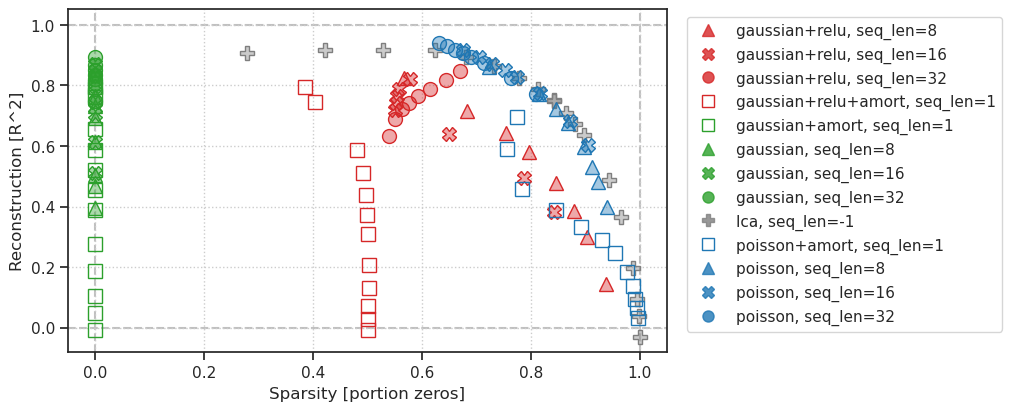

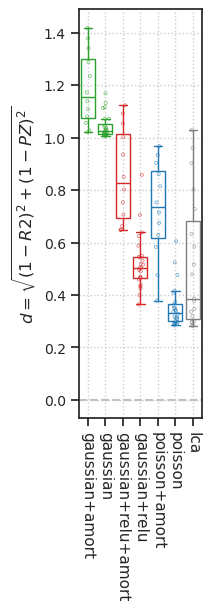

In [10]:
recon_metric = 'r2'  # for maximum a posteriori (MAP) decoding, use: 'r2_map'
_ = fig_ratedist_scatter(df_ratedist, recon_metric=recon_metric, labels=True, figsize=(10, 4))
_ = fig_ratedist_box(df_ratedist, recon_metric=recon_metric, labels=True, figsize=(2, 6))

## Table 2: mnist

In [11]:
from figures.table import table_mnist

In [12]:
df_table = pd.read_pickle(pjoin(root, 'df_table.df'))

In [13]:
df = df_table.loc[df_table['str_model'] == 'poisson']
df

,dataset,type,latent_act,str_model,archi,seq_len,kl_beta,n_latents,seed,amort,r2,mse,mse_perdim,%-zeros,accu,n_params
0,MNIST,poisson,None,poisson,<grad|lin>,128.0,128.0,512,0,False,0.951021,3.435594,4.382135,0.844174,96.37,403217
1,MNIST,poisson,None,poisson,<grad|lin>,128.0,128.0,512,1,False,0.951163,3.428769,4.373429,0.843293,96.46,403217
2,MNIST,poisson,None,poisson,<grad|lin>,128.0,128.0,512,2,False,0.950543,3.470668,4.426873,0.844749,96.53,403217
3,MNIST,poisson,None,poisson,<grad|lin>,128.0,128.0,512,3,False,0.951094,3.429352,4.374174,0.844411,96.45,403217
4,MNIST,poisson,None,poisson,<grad|lin>,128.0,128.0,512,4,False,0.951042,3.429271,4.374070,0.843090,96.48,403217


In [14]:
df = df_table.loc[df_table['str_model'] == 'poisson+amort']
df

,dataset,type,latent_act,str_model,archi,seq_len,kl_beta,n_latents,seed,amort,r2,mse,mse_perdim,%-zeros,accu,n_params
15,MNIST,poisson,None,poisson+amort,<conv+b|conv+b>,1.0,1.0,512,10,True,0.713970,19.920124,25.408321,0.839160,98.12,6794246
16,MNIST,poisson,None,poisson+amort,<conv+b|conv+b>,1.0,1.0,512,11,True,0.711649,20.106482,25.646022,0.838425,97.79,6794246
17,MNIST,poisson,None,poisson+amort,<conv+b|conv+b>,1.0,1.0,512,12,True,0.714276,19.858644,25.329904,0.836394,97.93,6794246
18,MNIST,poisson,None,poisson+amort,<conv+b|conv+b>,1.0,1.0,512,13,True,0.712331,20.060297,25.587114,0.837140,97.64,6794246
19,MNIST,poisson,None,poisson+amort,<conv+b|conv+b>,1.0,1.0,512,14,True,0.714154,19.942707,25.437126,0.836545,97.97,6794246


## Figure 10: effect of beta

Only for iP-VAE

In [15]:
df_poisson = df_ratedist.loc[df_ratedist['str_model'] == 'poisson'].copy()
df_poisson['beta_ratio'] = df_poisson['kl_beta'] / df_poisson['seq_len']
df_poisson.shape

(24, 12)

In [16]:
_df = df_poisson.loc[df_poisson['seq_len'] == 16]
xticks = _df['beta_ratio'].values

In [17]:
from figures.fighelper import get_marker_style, get_palette_models

pal_models = get_palette_models()
labels = True

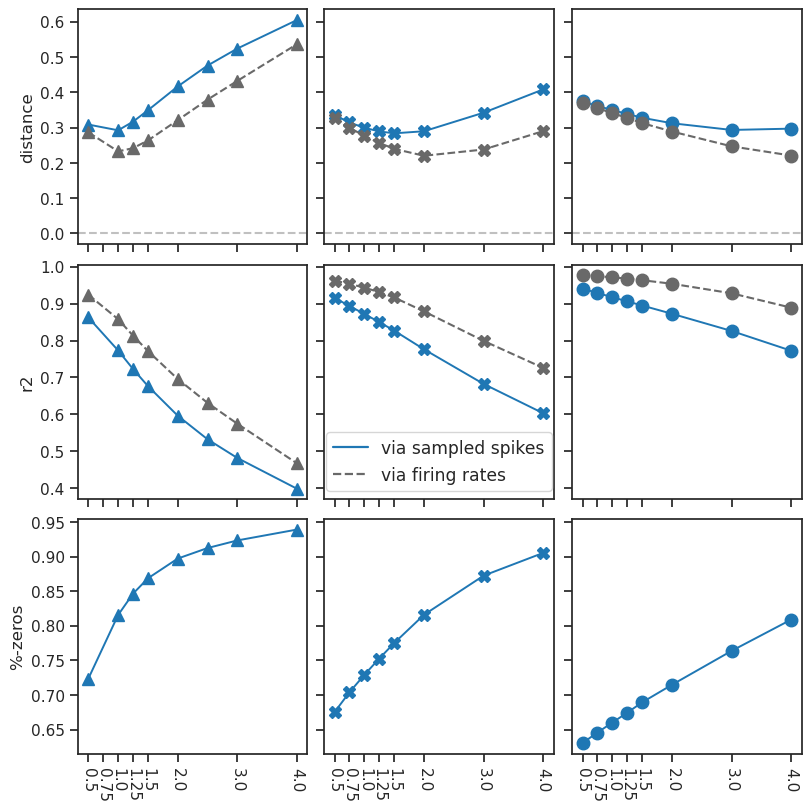

In [18]:
fig, axes = create_figure(3, 3, (8, 8), sharey='row', sharex='col', layout='tight')

for j, seq_len in enumerate([8, 16, 32]):
    _df = df_poisson.loc[df_poisson['seq_len'] == seq_len]
    for i, key in enumerate(['distance', 'r2', '%-zeros']):
        ax = axes[i, j]
        ax.plot(
            _df['beta_ratio'].values,
            _df[key].values,
            marker=get_marker_style(seq_len)[0],
            color=pal_models['poisson'],
            markersize=9,
            ls='-',
            lw=1.4,
        )
        key_map = f"{key}_map"
        if key_map in _df:
            ax.plot(
                _df['beta_ratio'].values,
                _df[key_map].values,
                marker=get_marker_style(seq_len)[0],
                color='dimgrey',
                markersize=9,
                ls='--',
            )
        if j == 0 and labels:
            ax.set(ylabel=key)
        if i == 2:
            ax.set(
                xticks=xticks,
                xticklabels=xticks,
            )
            ax.tick_params(axis='x', rotation=-90)
for ax in axes[0]:
    ax.axhline(0, color='silver', ls='--', zorder=0)

legend_elements = [
    matplotlib.lines.Line2D(
        [0], [0],
        label='via sampled spikes',
        color=pal_models['poisson'],
        lw=1.6,
        ls='-',
        marker=None),
    matplotlib.lines.Line2D(
        [0], [0],
        label='via firing rates',
        color='dimgrey',
        lw=1.6,
        ls='--',
        marker=None)
]
axes[1, 1].legend(
    handles=legend_elements,
    loc='lower center',
    fontsize=12.4,
)
plt.show()
# add_grid(axes)
# save_fig('ratedist_poisson_beta.pdf', figs_dir, fig, display=True)